<a href="https://colab.research.google.com/github/SriramaBhat/Dog_Breed_Identification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Identification using Deep Learning

## 1. Problem Statement:
> The objective of this project is to identify the breed of the dog from the image by the use of deep learning algorithms, such as Convoluted Neural Networks, etc., by using TensorFlow framework.

## 2. Data:
> Obtained from the kaggle dog breed identification competition. The data contains images of various dog breeds with labels and split as test and training datasets. URL: https://www.kaggle.com/c/dog-breed-identification/data.

## 3. Evaluation:
> The Evaluation is a file with predicted probabilities of each dog breed. Multiclass Log loss is used as the metric of evaluation. URL: https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features:
* The data is Images (Unstructured Data)
* There are 120 breeds of dogs in the dataset (120 classes).
* There are around 10,000+ images in training set, with labels.
* There are around 10,000+ images in test set, without labels.

## 1. Extracting data from the zip file

In [ ]:
# !unzip "drive/MyDrive/Dog_Breed_Identification/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Breed_Identification/"

## 2. Getting the workspace ready by importing the frameworks and libraries.
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Use a GPU

In [ ]:
# Import the tools
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import os
from sklearn.model_selection import train_test_split
import datetime
print("TF Version: ", tf.__version__)
print("TF Hub Version: ", hub.__version__)

# Check for GPU Availability
print("GPU", "Available, yes!!" if tf.config.list_physical_devices("GPU") else "Not available")

TF Version:  2.12.0
TF Hub Version:  0.14.0
GPU Available, yes!!


## 3. Getting the data ready
All machine learning models must have data in a numerical format. Therefore the images need to be converted into tensors and labels into numbers after being loaded.

In [ ]:
labels_data = pd.read_csv("drive/MyDrive/Dog_Breed_Identification/labels.csv")
labels_data.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_data.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

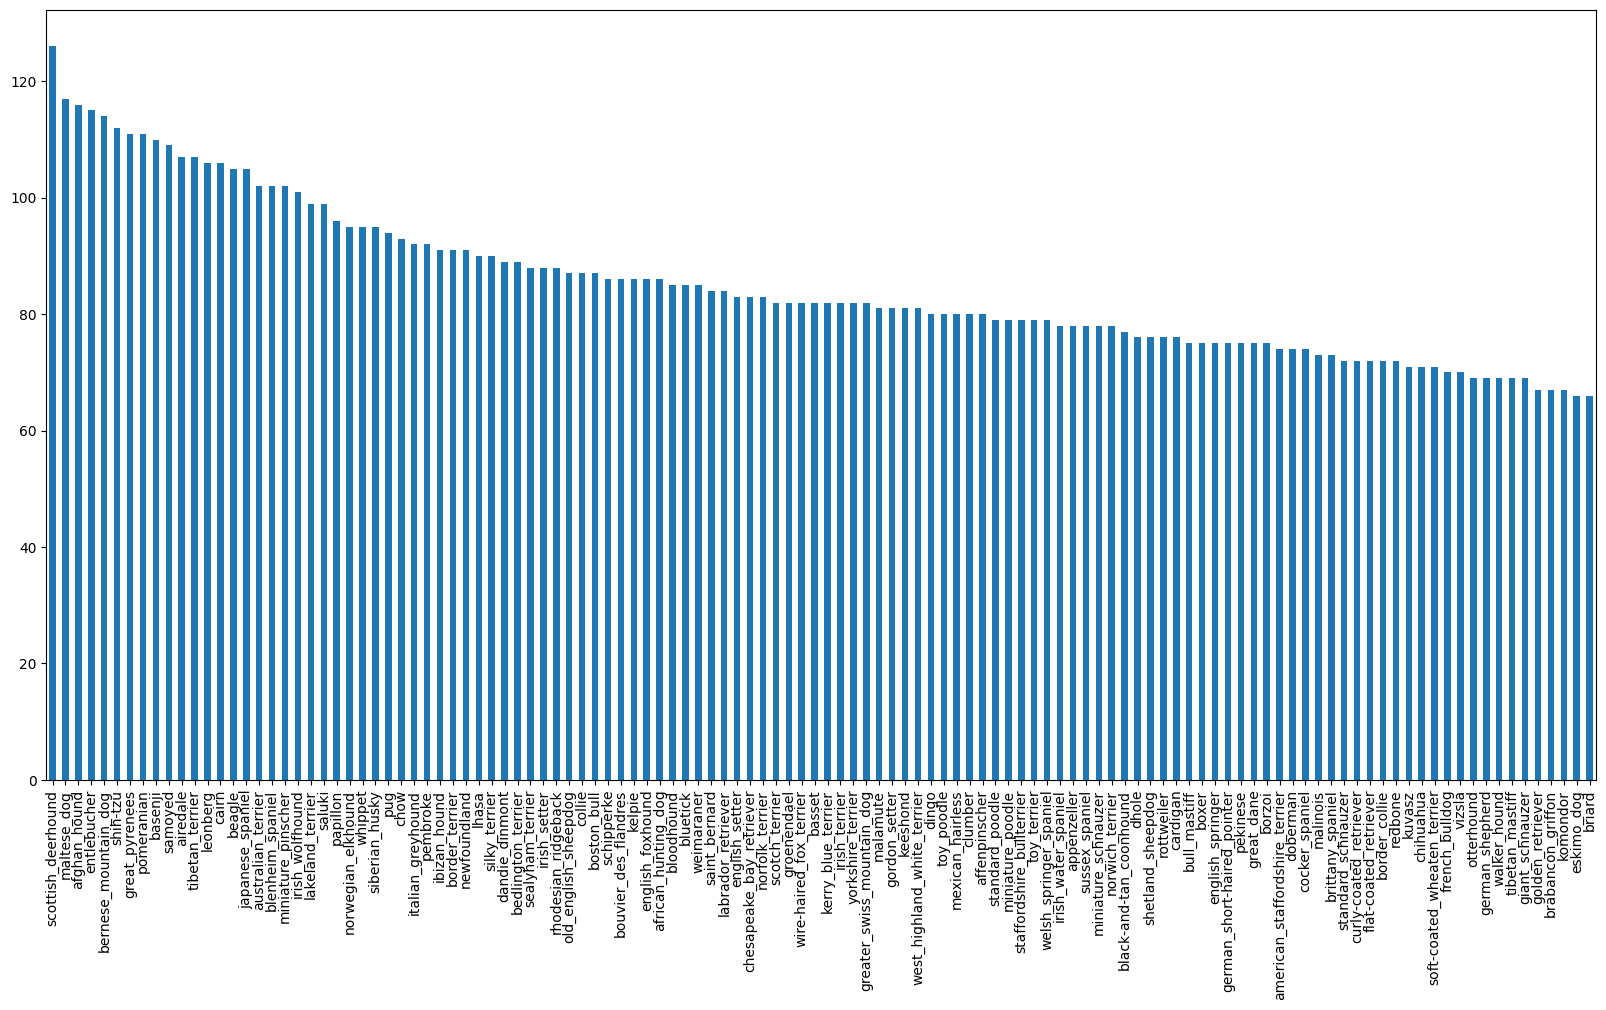

In [ ]:
# Number of images of each breed
labels_data["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_data["breed"].value_counts().median()

82.0

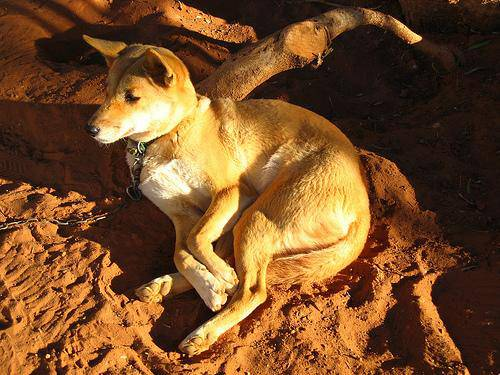

In [ ]:
# Viewing an image
Image("drive/My Drive/Dog_Breed_Identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### i. Getting Image paths as a list

In [ ]:
labels_data.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Concatenate the filename with the extension
filenames = ["drive/My Drive/Dog_Breed_Identification/train/" + fname + ".jpg" for fname in labels_data["id"]]

# Listing the first five elements to verifiy
filenames[:5]

['drive/My Drive/Dog_Breed_Identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog_Breed_Identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog_Breed_Identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog_Breed_Identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog_Breed_Identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
# Check if number of files and filenames are equal
if len(os.listdir("drive/My Drive/Dog_Breed_Identification/train/")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames donot match the number of files")

Filenames match actual amount of files


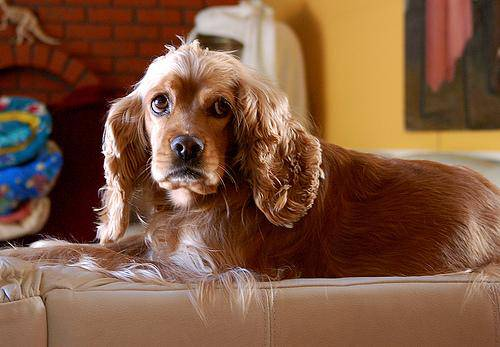

In [ ]:
# Check if filenames are correct
Image(filenames[5555])

### ii. Preparing labels

In [ ]:
labels = labels_data["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
if len(filenames) == len(labels):
  print("All OK, proceed")
else:
  print("Number of labels not equal to number of filenames")

All OK, proceed


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turning all labels into boolean arrays
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example of converting boolean array to integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### iii. Creating our own validation set

In [ ]:
X = filenames
y = boolean_labels

Start off by experimenting with ~1000 images and increase as needed

In [ ]:
# Setting the number of images for experimentation
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max:10222, step: 100}

In [ ]:
# Splitting data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog_Breed_Identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog_Breed_Identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog_Breed_Identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog_Breed_Identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog_Breed_Identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

### iv. Turning images into tensors
The function does the following things:
1. Take image as the input
2. Use TensorFlow to read the image and save it into a variable `image`
3. Turn the `image` into tensors.
4. Normalize the `image` color channels
5. Resize the `image` to a standard size (224, 224)
6. Return the modified `image`

In [ ]:
image = plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define the image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and converts the image into a tensor
  """
  image = tf.io.read_file(image_path)
  # Turn jpeg image into numerical tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

### v. Turning the data into batches (Minibatch size = 32)
To use TensorFlow Effectively, we need to pass the input as `(image, label)` Tensor tuple, 32 at a time.

In [ ]:
def get_image_label(image_path, label):
  """
  Takes an image path and label and returns a tensor tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
BATCH_SIZE = 32
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of images (X) and label (y) pairs.
  Shuffles the data if it's training data, else it does not shuffle.
  Also accepts test data with no labels.
  """
  # If the data is test dataset
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only the file paths,  no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is validation dataset
  elif valid_data:
    print("Creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the data is training data
  else:
    print("Create training data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Creating Minibatches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Create training data batches....
Creating validation data batches....


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
## Visualizing Data Batches
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from data batches.
  """
  plt.figure(figsize=(15, 15))
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

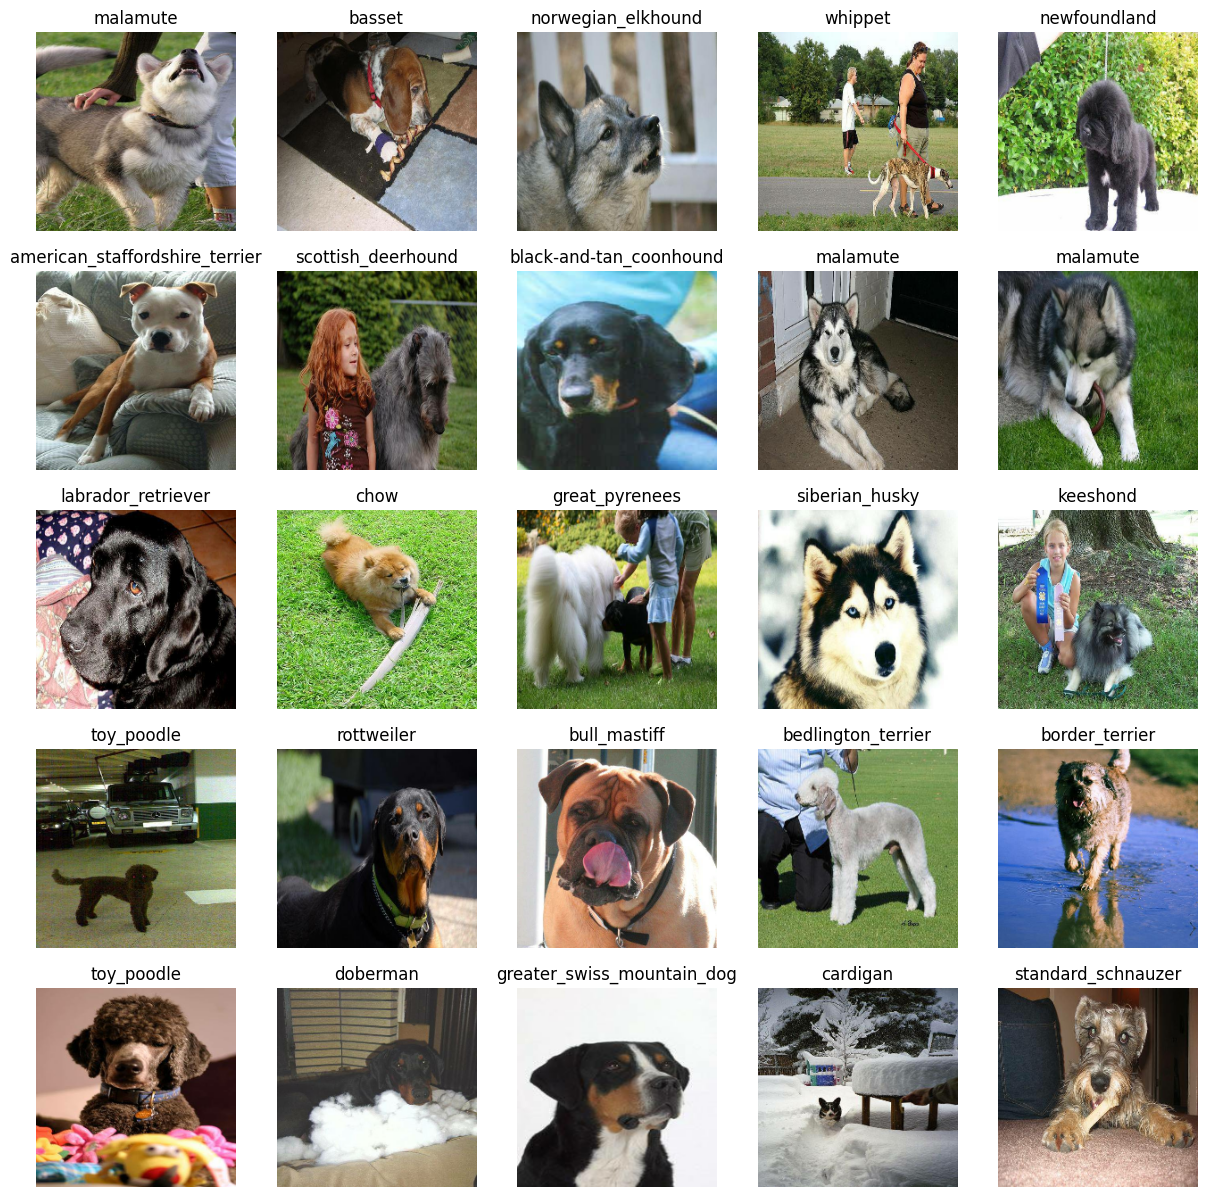

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

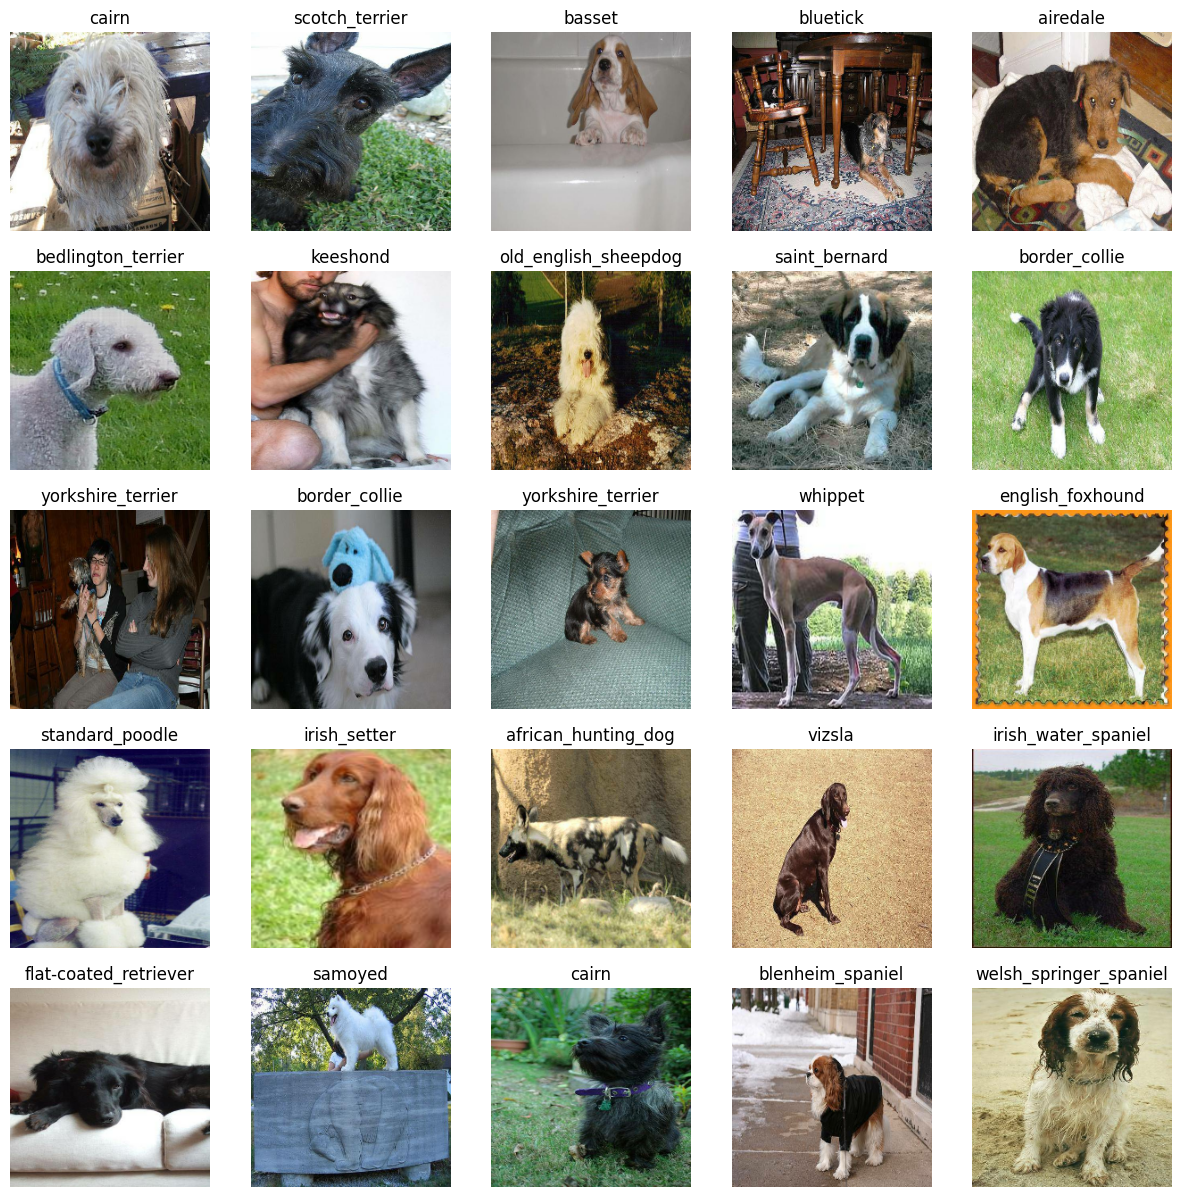

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## 4. Building a model
Transfer learning is used for training and building the model. For this the following must be defined:
* The input shape (shape of image tensors) to be given to the model.
* The output shape (shape of label tensors) that is given by the model.
* The URL of the model to be used from TensorFlow Hub URL: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5



### i. Setup the model parameters

In [ ]:
# Setup of the input shape of the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup of output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


### ii. Input the input, output and model into the TensorFlow Keras API
Create a function which:
* Takes the input, output shapes and model selected
* Define the layers of Keras model in sequential manner
* Compiles the model (Says it should be evaluated and improved)
* Builds the model
* Returns the model

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### iii. Creating Callbacks
Callbacks are helper functions that a model can use in training to do things like check it's progress, save the progress or stop training if there is no imporvement.

Two callbacks will be implemented:
* For TensorBoard to track progress
* For preventing model from training too long

### -> TensorBoard Callback
Steps:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to the model's `fit()` function.
3. Visualize the model's training logs with the `%tensorboard` magic function (After the training).

In [ ]:
# Loading notebook extenstion
%load_ext tensorboard

In [ ]:
def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/Dog_Breed_Identification/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  return tf.keras.callbacks.TensorBoard(logdir)

### -> Early Stopping Callback
Early stopping helps to prevent the model from overfitting once a certain metric stops improving.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## 5. Training a Model (on a subset of data)
First model trains only on 1000 images, to make sure that everything works.

In [ ]:
NUM_EPOCHS = 100 # @param {type: "slider", min: 10, max: 100, step: 10}

In [ ]:
# Check for GPU
print("GPU", "available !!" if tf.config.list_physical_devices("GPU") else "not available")

GPU available !!


### i. Creating a function to train a model
* Create model using `create_model()`
* Setup TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function calling training, validation data and epoch numbers
* Return the model

In [ ]:
# Function to train a model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

Training the model on the data subset

In [ ]:
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 16s 177ms/step - loss: 4.4669 - accuracy: 0.1213 - val_loss: 3.3824 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 3s 125ms/step - loss: 1.5970 - accuracy: 0.6812 - val_loss: 2.1672 - val_accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 4s 147ms/step - loss: 0.5552 - accuracy: 0.9400 - val_loss: 1.6631 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 4s 162ms/step - loss: 0.2534 - accuracy: 0.9862 - val_loss: 1.4814 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 4s 153ms/step - loss: 0.1481 - accuracy: 0.9975 - val_loss: 1.3823 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 152ms/step - loss: 0.1007 - accuracy: 1.0000 - val_loss: 1.3379 - val_accuracy: 0.6700
Epoch 7/100
25/25 [============================

### ii. Evaluting and visualizing the model's performance
The TensorBoard magic function `(%tensorboard)` is used for the evaluation and visualization of the contents in the logs directory.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog_Breed_Identification/logs/

<IPython.core.display.Javascript object>

## 6. Making predictions and evaluating the trained model

In [ ]:
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 16s 97ms/step


In [ ]:
predictions, predictions.shape

(array([[2.6905322e-03, 7.9621255e-05, 7.6385426e-05, ..., 6.6517328e-04,
         1.2400856e-05, 3.1059107e-03],
        [2.6477443e-03, 2.2243848e-03, 7.0292200e-03, ..., 7.0471509e-04,
         2.3115566e-03, 5.3947885e-04],
        [7.9669044e-06, 1.2604335e-03, 3.2169707e-04, ..., 1.4224416e-04,
         3.5391738e-05, 2.5592549e-03],
        ...,
        [1.1782586e-05, 1.4726617e-05, 9.9510289e-05, ..., 1.3254493e-05,
         3.7924672e-04, 5.9829828e-05],
        [1.6106158e-03, 1.5622193e-04, 4.9218532e-05, ..., 2.7790273e-04,
         1.1248714e-04, 1.2481357e-02],
        [1.2014282e-03, 5.6919016e-05, 1.0380058e-02, ..., 4.1713207e-03,
         1.0162640e-03, 1.1184352e-04]], dtype=float32),
 (200, 120))

In [ ]:
len(predictions[0]), predictions[0]

(120,
 array([2.6905322e-03, 7.9621255e-05, 7.6385426e-05, 2.7723945e-05,
        1.1725973e-04, 6.9042057e-05, 4.5022294e-02, 9.3771110e-04,
        1.7142158e-04, 4.8588481e-04, 3.5883169e-04, 5.7390239e-04,
        3.7510283e-04, 5.3180374e-05, 2.3352251e-04, 2.2037662e-04,
        6.5994143e-05, 1.9656581e-01, 6.2686513e-06, 2.4726620e-05,
        1.2348476e-03, 9.0250978e-05, 2.1581694e-05, 7.8464334e-04,
        5.6318353e-05, 2.4205333e-04, 1.7621677e-01, 2.5686127e-04,
        2.4727494e-03, 6.8448899e-05, 7.0015907e-05, 1.0608563e-03,
        2.1307326e-04, 4.7771748e-05, 1.0061198e-04, 2.8286964e-02,
        3.6257893e-06, 8.5354119e-04, 1.4416000e-04, 4.6415176e-04,
        2.7396734e-04, 2.8991259e-05, 2.5885651e-04, 5.7590107e-05,
        1.1260836e-05, 8.5760083e-05, 4.3728051e-05, 7.6314514e-05,
        2.7896820e-03, 9.6290794e-05, 1.9659562e-04, 6.0695220e-05,
        1.2374045e-04, 1.1360738e-04, 9.6065889e-04, 5.9045513e-05,
        2.3515257e-05, 1.7993350e-03, 1.07

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
index = 42
print(predictions[index])
print("*" * 100)
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[3.70146590e-04 2.25072057e-04 1.88359161e-04 1.00486192e-04
 4.20940341e-03 7.63224598e-05 5.04810829e-04 3.21283890e-03
 1.24661969e-02 1.03442013e-01 5.75738159e-05 8.03231233e-05
 1.35422207e-03 1.02083366e-02 3.53165879e-03 7.74537167e-03
 2.39146000e-04 4.70519037e-04 2.78858090e-04 2.46171700e-03
 2.61571258e-05 6.12084172e-04 9.53925191e-05 4.97245419e-05
 1.44444704e-02 5.05328790e-05 8.12157887e-05 3.32845026e-04
 1.45851416e-04 1.17647978e-04 1.76790432e-04 1.95411019e-04
 1.38718024e-04 8.67692797e-05 5.58765241e-05 3.44210493e-05
 4.73959342e-04 2.26128424e-04 2.37160188e-04 3.33407521e-01
 1.38143147e-03 5.65274713e-05 2.32640933e-02 6.03432782e-05
 4.20596247e-04 8.73198267e-04 1.04807317e-03 9.44373431e-04
 5.70728407e-05 8.69534793e-04 1.98562906e-04 9.25172280e-05
 7.53755041e-04 2.11045332e-03 1.15884017e-04 3.23261804e-04
 8.85519898e-04 2.51554360e-04 2.77933665e-04 2.50411304e-05
 6.98072326e-05 6.98736752e-04 1.16369978e-04 4.80648741e-05
 1.05759513e-03 3.690862

In [ ]:
# Turning prediction probabilities into labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities (confidence levels) into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]


In [ ]:
# Function to unbatch a dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns images and labels as seperate arrays.
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

### Visualize the model predictions and evaluate them.
Create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob) * 100, true_label), color=color)

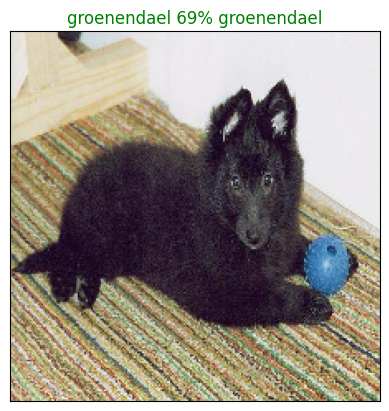

In [ ]:
plot_pred(prediction_probabilities=predictions, labels=val_labels,
          images=val_images, n=77)

Create a function to visualize top ten predictions which will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using get_pred_label()
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 confidences with truth label for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)

  # Find top 10 prediction confidences
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

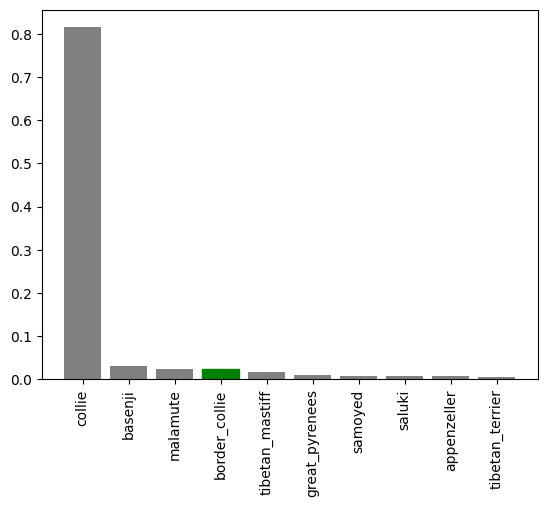

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

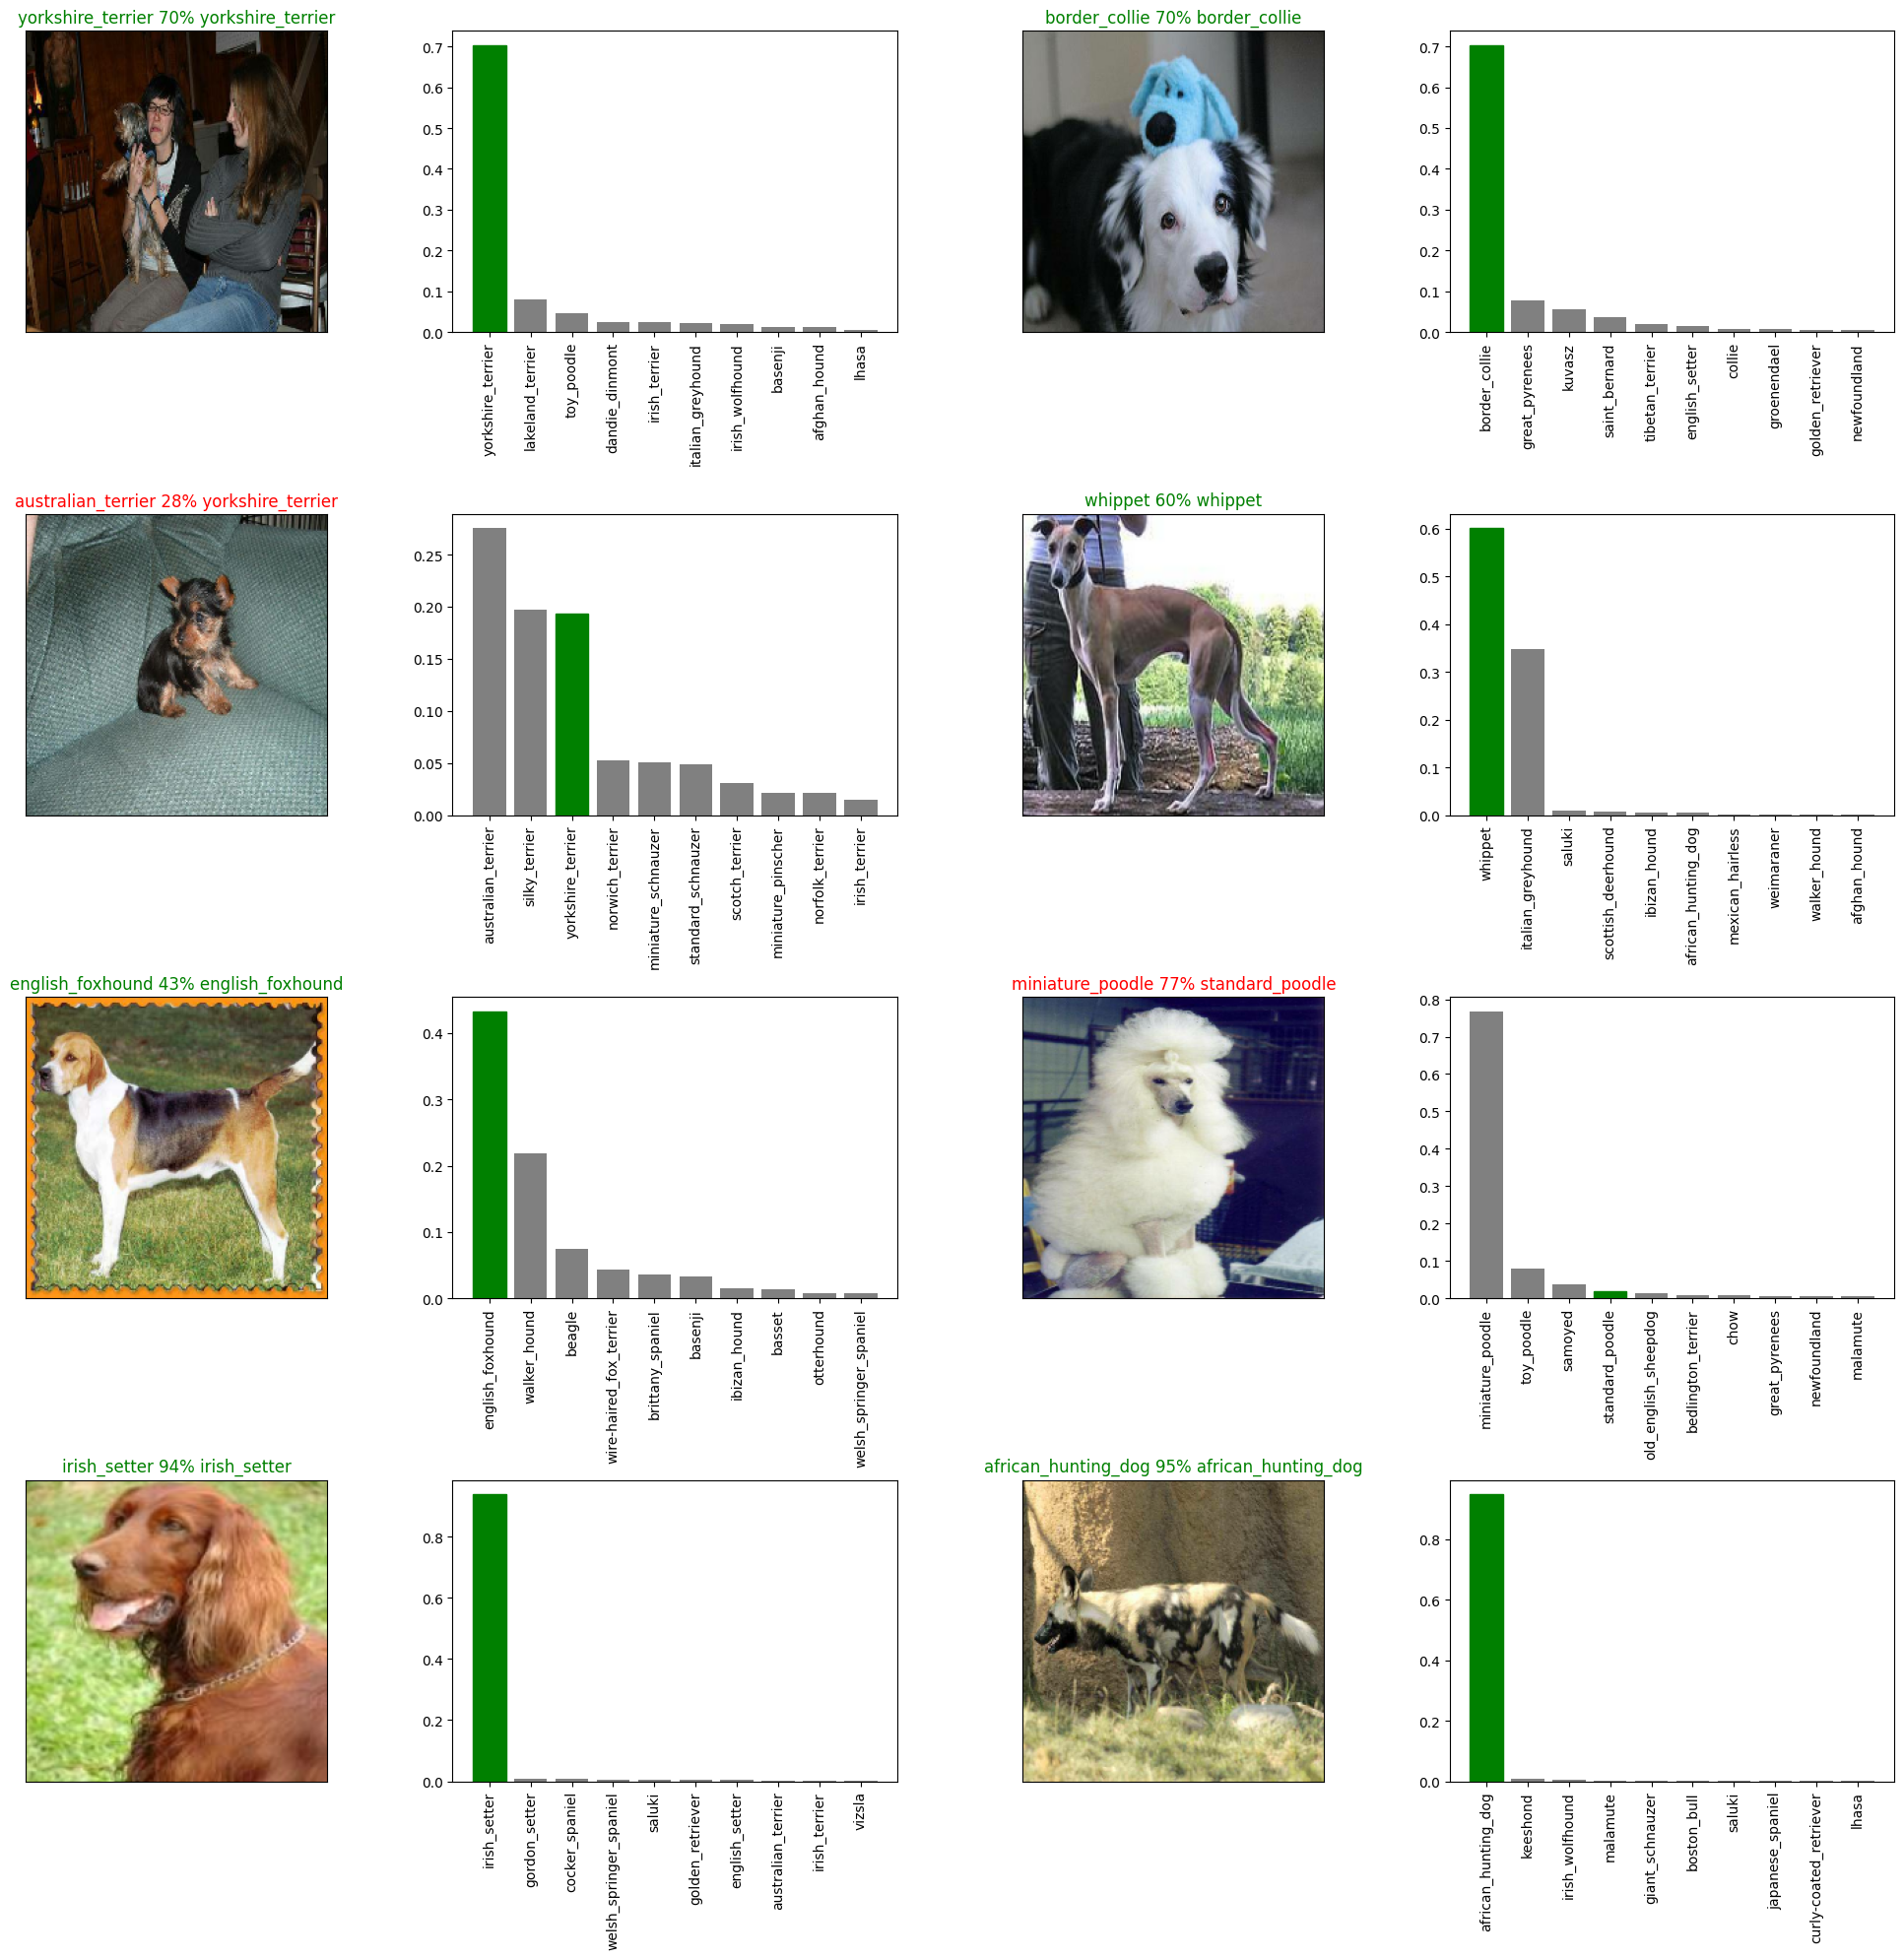

In [ ]:
i_multiplier = 10
num_rows = 4
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## 7. Saving and reloading the model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a model in the model directory, and appends a suffix string if given
  """
  modeldir = os.path.join("drive/My Drive/Dog_Breed_Identification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print("Saving model to ", model_path, " ...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to save a model
def load_model(model_path):
  """
  Loads a model from specified path
  """
  print("Loading model from ", model_path, " ...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})
  return model

### Making sure the save and loading model works

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2")

Saving model to  drive/My Drive/Dog_Breed_Identification/models/20230820-18131692555220-1000-images-mobilenetv2.h5  ...


'drive/My Drive/Dog_Breed_Identification/models/20230820-18131692555220-1000-images-mobilenetv2.h5'

In [ ]:
loaded_1000_image_model = load_model("drive/MyDrive/Dog_Breed_Identification/models/20230820-18131692555220-1000-images-mobilenetv2.h5")

Loading model from  drive/MyDrive/Dog_Breed_Identification/models/20230820-18131692555220-1000-images-mobilenetv2.h5  ...


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 87ms/step - loss: 1.2677 - accuracy: 0.6700


[1.2677327394485474, 0.6700000166893005]

In [ ]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 88ms/step - loss: 1.2677 - accuracy: 0.6700


[1.2677327394485474, 0.6700000166893005]

## 7. Training a model on the complete dataset


In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
len(X_train), len(y_train)

(800, 800)

In [ ]:
# Create a databatch with full dataset
full_data = create_data_batches(X, y)

Create training data batches....


In [ ]:
full_data, len(full_data)

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 320)

In [ ]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# Training on full dataset, no we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 43s 111ms/step - loss: 1.3612 - accuracy: 0.6637
Epoch 2/100
320/320 [==============================] - 37s 114ms/step - loss: 0.4028 - accuracy: 0.8778
Epoch 3/100
320/320 [==============================] - 36s 113ms/step - loss: 0.2399 - accuracy: 0.9343
Epoch 4/100
320/320 [==============================] - 36s 113ms/step - loss: 0.1547 - accuracy: 0.9625
Epoch 5/100
320/320 [==============================] - 36s 113ms/step - loss: 0.1062 - accuracy: 0.9784
Epoch 6/100
320/320 [==============================] - 36s 114ms/step - loss: 0.0792 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0587 - accuracy: 0.9910
Epoch 8/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0469 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0384 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 36s 112m

In [ ]:
save_model(full_model, suffix="full-image-dataset-mobilenetv2")

Saving model to  drive/My Drive/Dog_Breed_Identification/models/20230820-18501692557425-full-image-dataset-mobilenetv2.h5  ...


'drive/My Drive/Dog_Breed_Identification/models/20230820-18501692557425-full-image-dataset-mobilenetv2.h5'

## 8. Making predictions with the trained model
As trainig inputs were in forms of tensors, get the test data into the same format

Steps:
* Get test filenames
* Convert the filenames into test databatches using `create_data_batches()` and setting `test_data` parameter to `True`
* Make a predictions array by passing test batches to the `predict()` method on the model.

In [ ]:
# Converting test data into filenames
test_path = "drive/MyDrive/Dog_Breed_Identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]

['drive/MyDrive/Dog_Breed_Identification/test/e65bf4e655ccf594210174f124e3adf0.jpg',
 'drive/MyDrive/Dog_Breed_Identification/test/e5c313a35ac162b3b88b50157f6fd309.jpg',
 'drive/MyDrive/Dog_Breed_Identification/test/e3cec8d0c1876ac36942d35f64b9dfa0.jpg',
 'drive/MyDrive/Dog_Breed_Identification/test/df9ee3c663b1f2ca84781c09fa8c31f8.jpg',
 'drive/MyDrive/Dog_Breed_Identification/test/e411a1b3681604f6321af7cb8e8f2de7.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Creating test databatches
test_data_batches = create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [ ]:
test_data_batches

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the test data
# For loading a pretrained model:
loaded_full_model = load_model("drive/My Drive/Dog_Breed_Identification/models/20230820-18501692557425-full-image-dataset-mobilenetv2.h5")
test_predictions = loaded_full_model.predict(test_data_batches, verbose=1)

Loading model from  drive/My Drive/Dog_Breed_Identification/models/20230820-18501692557425-full-image-dataset-mobilenetv2.h5  ...
324/324 [==============================] - 44s 133ms/step


In [ ]:
# Saving the predictions as a csv file
np.savetxt("drive/My Drive/Dog_Breed_Identification/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
test_predictions[:5]

array([[1.89541938e-10, 8.53529351e-15, 4.36499244e-15, 1.29805571e-14,
        2.08415506e-13, 1.39818036e-11, 1.23137171e-15, 2.77234968e-13,
        2.82593502e-13, 1.80304799e-11, 1.77978266e-15, 7.66198129e-12,
        9.49736817e-13, 1.68972253e-10, 5.65253504e-15, 5.14443956e-13,
        5.59286775e-14, 5.54339072e-13, 1.35350130e-12, 1.73251143e-13,
        2.88440172e-15, 1.19071038e-11, 1.15060843e-10, 5.92634123e-14,
        4.48990007e-14, 8.73520006e-12, 7.90256668e-14, 4.06916163e-16,
        3.83471848e-15, 2.77482291e-11, 8.28856704e-14, 3.80966829e-12,
        3.95745889e-14, 1.01534330e-12, 9.70815907e-16, 2.98813140e-17,
        6.00480874e-13, 4.03638304e-14, 2.05352974e-14, 3.87820720e-10,
        2.71939433e-11, 8.01049223e-15, 6.68791953e-13, 2.28508446e-16,
        1.31301751e-12, 3.91791710e-10, 3.44130322e-15, 1.65257239e-12,
        4.08439287e-13, 5.90310353e-13, 9.40575829e-12, 4.23918171e-13,
        3.15368009e-11, 1.69550279e-12, 7.74106053e-14, 2.832379

In [ ]:
test_predictions = np.loadtxt("drive/MyDrive/Dog_Breed_Identification/preds_array.csv", delimiter=",")
test_predictions

array([[1.89541938e-10, 8.53529351e-15, 4.36499244e-15, ...,
        3.50384801e-14, 5.64853789e-11, 4.47784605e-12],
       [3.14689402e-07, 6.80733914e-09, 7.77832590e-11, ...,
        3.40965992e-12, 3.85412324e-14, 2.23458228e-13],
       [2.34830666e-12, 3.68716915e-15, 1.66575770e-12, ...,
        1.52220056e-10, 2.99736375e-10, 2.00120953e-12],
       ...,
       [5.61452218e-08, 5.86394960e-11, 1.46607715e-09, ...,
        2.83634364e-07, 2.53776790e-07, 7.61409061e-11],
       [1.23018498e-13, 2.18619271e-13, 9.07764905e-11, ...,
        7.83484999e-10, 3.27413652e-09, 6.75869916e-11],
       [1.11645537e-11, 7.48434439e-11, 1.54019708e-09, ...,
        3.87378335e-13, 6.49629742e-12, 5.84450717e-12]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing the predictions in Kaggle Submission format

In [ ]:
# Create a pandas dataframe
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e65bf4e655ccf594210174f124e3adf0   1.895419e-10  8.535294e-15   
1  e5c313a35ac162b3b88b50157f6fd309   3.146894e-07  6.807339e-09   
2  e3cec8d0c1876ac36942d35f64b9dfa0   2.348307e-12  3.687169e-15   
3  df9ee3c663b1f2ca84781c09fa8c31f8   1.611899e-15  6.484948e-15   
4  e411a1b3681604f6321af7cb8e8f2de7   5.854212e-12  1.872762e-11   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.364992e-15  1.298056e-14                    2.084155e-13   
1         7.778326e-11  2.936599e-08                    1.450643e-10   
2         1.665758e-12  9.873666e-11                    9.114128e-05   
3         7.275959e-14  2.572695e-15                    1.794975e-15   
4         4.054994e-06  1.184253e-05                    2.757917e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.398180e-11        1.231372e-15  2.772350e-13  2.825935e-13  ...   
1  1.851039e-10        5.704549e-10  3.207628e-12  1.029051e-09  ...   
2  1.840407e-12        5.734891e-11  1.289313e-13  2.405365e-13  ...   
3  9.164620e-16        2.684174e-15  3.820774e-13  3.076154e-15  ...   
4  1.333785e-07        1.505762e-08  4.225768e-03  9.928288e-01  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  7.561166e-13  1.931746e-13  6.694416e-13  4.945885e-14  7.691866e-16   
1  2.001182e-11  4.140618e-13  2.211822e-11  8.051274e-10  3.085696e-10   
2  8.373761e-11  4.136985e-12  3.955278e-12  1.366343e-10  6.516697e-13   
3  2.508882e-16  1.607841e-10  1.590824e-15  5.001743e-16  4.645960e-17   
4  5.772516e-08  1.026810e-06  5.868374e-09  6.751279e-08  6.858145e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.679871e-14                 3.362051e-13  3.503848e-14   
1            2.580353e-12                 4.242968e-13  3.409660e-12   
2            4.963047e-12                 6.314197e-10  1.522201e-10   
3            3.437787e-17                 2.822536e-15  3.074095e-11   
4            3.682261e-06                 3.932254e-07  9.667206e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             5.648538e-11       4.477846e-12  
1             3.854123e-14       2.234582e-13  
2             2.997364e-10       2.001210e-12  
3             5.398422e-13       7.424289e-15  
4             3.012227e-11       4.086455e-08  

[5 rows x 121 columns]

In [ ]:
# Saving the predictions to CSV file for submission
preds_df.to_csv("drive/MyDrive/Dog_Breed_Identification/full_model_predictions_submission_1_mobilenetv2.csv",
                index=False)